In [2]:
import pandas as pd
bank = pd.read_csv('bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
bank.shape

(4119, 21)

In [4]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [5]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
bank['y'] = (bank['y']=='yes').astype(int)

In [7]:
bank.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
def education_category(value):
    cat = ""
    value = str(value)
    if 'basic' in value:
        cat = 'Basic'
    elif 'university' in value:
        cat = "University"
    elif 'professional' in value:
        cat = 'Professional'
    elif 'high' in value:
        cat = "High School"
    elif 'illiterate' in value:
        cat = "Illiterate"
    elif 'unknown' in value:
        cat = "Unknown"
    return cat.strip()

In [9]:
bank['education'] = bank['education'].apply(education_category)
print(bank.head())

   age          job  marital    education default  housing     loan  \
0   30  blue-collar  married        Basic      no      yes       no   
1   39     services   single  High School      no       no       no   
2   25     services  married  High School      no      yes       no   
3   38     services  married        Basic      no  unknown  unknown   
4   47       admin.  married   University      no      yes       no   

     contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri ...         2    999         0  nonexistent   
1  telephone   may         fri ...         4    999         0  nonexistent   
2  telephone   jun         wed ...         1    999         0  nonexistent   
3  telephone   jun         fri ...         3    999         0  nonexistent   
4   cellular   nov         mon ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0         -1.8          92.89

In [10]:
bank.education.unique()

array(['Basic', 'High School', 'University', 'Professional', 'Unknown',
       'Illiterate'], dtype=object)

In [11]:
bank.y.value_counts()

0    3668
1     451
Name: y, dtype: int64

In [12]:
bank.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [13]:
# y = 1 for customers who bought term deposit
# y = 0 for customers who did not buy term deposit

# grouping based on education

bank.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


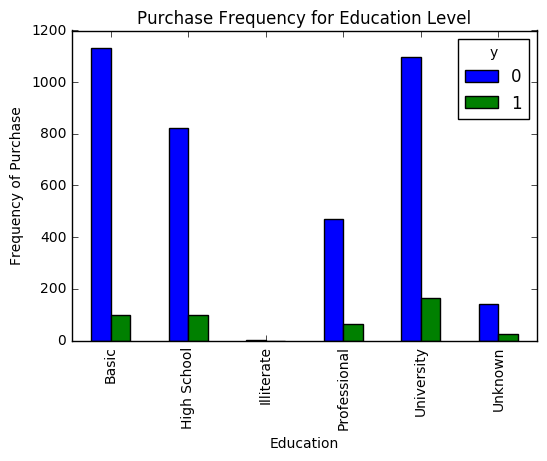

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.crosstab(bank.education,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Education Level')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')

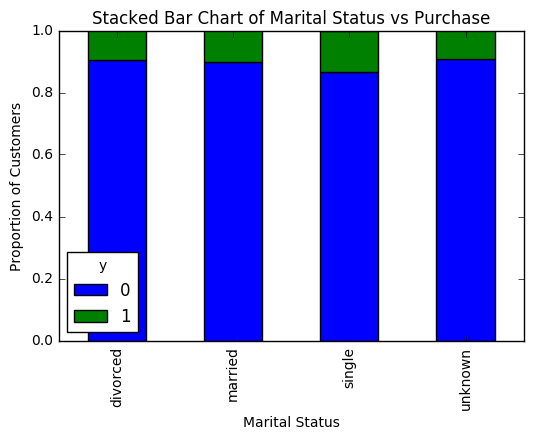

In [15]:
# Marital Status v/s Buying Term Deposit

table=pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

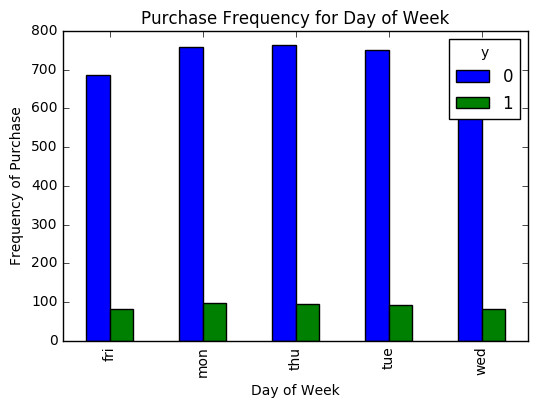

In [16]:
# Days of the week v/s buying term deposit

pd.crosstab(bank.day_of_week,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

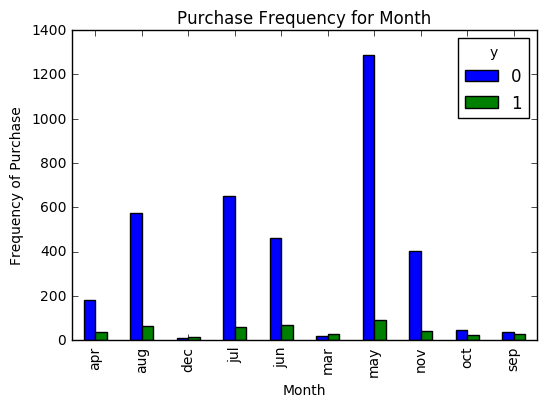

In [17]:
# Month of purchase v/s buying of term deposit

pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

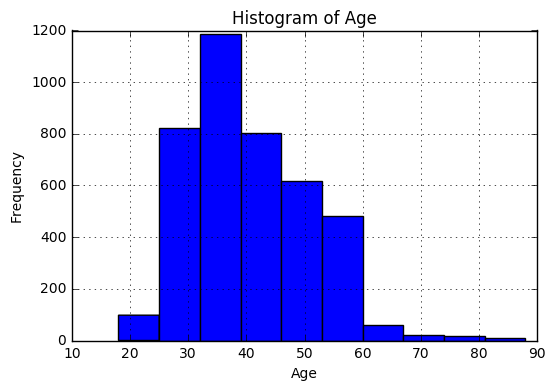

In [18]:
bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [19]:
bank.age.min()

18

In [20]:
bank.age.max()

88

In [21]:
# changing the age into categories 

def age_category(value):
    age_cat = ""
    if value < 30: age_cat = "Young"
    elif value < 55: age_cat = "Adult"
    else: age_cat = "Old"    
    return age_cat.strip()


In [22]:
# bank_age2 = bank
# bank_age2["age"] = bank_age2["age"].apply(age_category)

# table=pd.crosstab(bank_age2.age,bank.y)
# table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
# plt.title('Stacked Bar Chart of Age Category vs Purchase')
# plt.xlabel('Age Category')
# plt.ylabel('Proportion of Customers')

In [23]:
# Creating Dummy Variables for categorical features

cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bank[var], prefix=var)
    bank1=bank.join(cat_list)
    bank=bank1
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
bank_vars=bank.columns.values.tolist()
to_keep=[i for i in bank_vars if i not in cat_vars]
bank_final=bank[to_keep]
bank_final.columns.values    

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional',
       'education_University', 'education_Unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_o

In [24]:
bank_final_vars=bank_final.columns.values.tolist()
Y=['y']
X=[i for i in bank_final_vars if i not in Y ]

In [25]:
bank_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [26]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 12)
rfe = rfe.fit(bank_final[X],bank_final[Y] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Sudhanshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False  True False
  True]
[37 43 18 44  1 14 30 29  1 42 23  3  1 40  2 41  1  5 32 35 12 47 19 38 33
 50 31 13 48 22 34  8 39 36 49 20  6 10 15  9 24 16  4 45 25  1  1  1  1  1
 17  1 46 26 21 28 27 11  1  7  1]


In [27]:
l = list(zip(bank_final_vars, rfe.ranking_))
for val in l:
    print(val)

('age', 37)
('duration', 43)
('campaign', 18)
('pdays', 44)
('previous', 1)
('emp.var.rate', 14)
('cons.price.idx', 30)
('cons.conf.idx', 29)
('euribor3m', 1)
('nr.employed', 42)
('y', 23)
('job_admin.', 3)
('job_blue-collar', 1)
('job_entrepreneur', 40)
('job_housemaid', 2)
('job_management', 41)
('job_retired', 1)
('job_self-employed', 5)
('job_services', 32)
('job_student', 35)
('job_technician', 12)
('job_unemployed', 47)
('job_unknown', 19)
('marital_divorced', 38)
('marital_married', 33)
('marital_single', 50)
('marital_unknown', 31)
('education_Basic', 13)
('education_High School', 48)
('education_Illiterate', 22)
('education_Professional', 34)
('education_University', 8)
('education_Unknown', 39)
('default_no', 36)
('default_unknown', 49)
('default_yes', 20)
('housing_no', 6)
('housing_unknown', 10)
('housing_yes', 15)
('loan_no', 9)
('loan_unknown', 24)
('loan_yes', 16)
('contact_cellular', 4)
('contact_telephone', 45)
('month_apr', 25)
('month_aug', 1)
('month_dec', 1)
('mont

In [28]:
cols=['previous', 'euribor3m', 'job_entrepreneur', 'job_self-employed',
'poutcome_success', 'poutcome_failure', 'month_oct', 'month_may',
'month_mar', 'month_jun', 'month_jul', 'month_dec']
X=bank_final[cols]
Y=bank_final['y']

In [29]:
# Advantage pf statsmodels,api is that it calculates p values in the summary
# Disadv is that it is not powerful enough to predict, calculate scores and perform other operations

import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.279180
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Mon, 16 Jan 2017   Pseudo R-squ.:                  0.1918
Time:                        23:01:02   Log-Likelihood:                -1149.9
converged:                       True   LL-Null:                       -1422.9
                                        LLR p-value:                4.975e-110
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
previous              0.3493      0.141      2.475      0.013         0.073     0.626
euribor3

In [30]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X, Y)
# Accuracy
clf.score(X,Y)

0.90216071862102454

In [31]:
# log(odds)
# if previous incresesby 1, log(odds) will increase by 0.37

import numpy as np
pd.DataFrame(list(zip(X.columns, np.transpose(clf.coef_))))

,0,1
0,previous,[0.379831613174]
1,euribor3m,[-0.502749071717]
2,job_entrepreneur,[-0.343066155824]
3,job_self-employed,[-0.335064163669]
4,poutcome_success,[1.07783253327]
5,poutcome_failure,[-0.753161868163]
6,month_oct,[0.411855745563]
7,month_may,[-0.74308963052]
8,month_mar,[1.27036122938]
9,month_jun,[0.509694983727]


In [32]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
random_state=0)

C:\Users\Sudhanshu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
from sklearn import linear_model
from sklearn import metrics
clf1 = linear_model.LogisticRegression()
clf1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
probs = clf1.predict_proba(X_test)
probs

array([[ 0.93352157,  0.06647843],
       [ 0.88259365,  0.11740635],
       [ 0.93040666,  0.06959334],
       ..., 
       [ 0.73273217,  0.26726783],
       [ 0.97862459,  0.02137541],
       [ 0.24746608,  0.75253392]])

In [35]:
# Threshold is 0.5

predicted = clf1.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 1])

In [36]:
# Threshold set to 0.10

prob=probs[:,1]
prob_df=pd.DataFrame(prob)
prob_df['predict']=np.where(prob_df[0]>=0.10,1,0)
prob_df.head()

,0,predict
0,0.066478,0
1,0.117406,1
2,0.069593,0
3,0.062666,0
4,0.065086,0


In [37]:
(prob_df['predict'] == 1).sum()/prob_df['predict'].size

0.27750809061488674

In [38]:
print (metrics.accuracy_score(Y_test, predicted))

0.902103559871


In [39]:
# Cross Validation

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(linear_model.LogisticRegression(), X, Y,scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[ 0.92493947  0.90048544  0.90291262  0.89563107  0.90291262  0.90533981
  0.8907767   0.89563107  0.90024331  0.90024331]
0.901911540571


In [40]:
# Since the accuracy of the model and that of cross validation set is nearly the same
# We can say that the model Generalizes well!!!!

In [41]:
# Model Validation

# ROC Curve

from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)
clf1 = linear_model.LogisticRegression()
clf1.fit(X_train, Y_train)
probs = clf1.predict_proba(X_test)
probs

array([[ 0.93352157,  0.06647843],
       [ 0.88259365,  0.11740635],
       [ 0.93040666,  0.06959334],
       ..., 
       [ 0.73273217,  0.26726783],
       [ 0.97862459,  0.02137541],
       [ 0.24746608,  0.75253392]])

In [42]:
prob=probs[:,1]
prob_df=pd.DataFrame(prob)
prob_df['predict']=np.where(prob_df[0]>=0.05,1,0)
prob_df['actual']=Y_test
prob_df.head()

,0,predict,actual
0,0.066478,1,NaN
1,0.117406,1,0.0
2,0.069593,1,0.0
3,0.062666,1,NaN
4,0.065086,1,0.0


In [43]:
prob_df.actual.value_counts()

0.0    338
1.0     35
Name: actual, dtype: int64

In [44]:
prob_df["actual"] = prob_df['actual'].fillna(0)
print(prob_df.head())

# At p = 0.05
confusion_matrix=pd.crosstab(prob_df['actual'],prob_df['predict'])
confusion_matrix

          0  predict  actual
0  0.066478        1     0.0
1  0.117406        1     0.0
2  0.069593        1     0.0
3  0.062666        1     0.0
4  0.065086        1     0.0


predict,0,1
actual,,
0.0,414,787
1.0,14,21


In [45]:
# Sensitivity ==> TP/TP+FN = 21/21+14 = 0.6
# Spcificity ==> FP/FP+TN = 787/414+787 = 0.65

In [46]:
prob=probs[:,1]
prob_df=pd.DataFrame(prob)
prob_df['predict']=np.where(prob_df[0]>=0.10,1,0)
prob_df['actual']=Y_test
prob_df.head()

,0,predict,actual
0,0.066478,0,NaN
1,0.117406,1,0.0
2,0.069593,0,0.0
3,0.062666,0,NaN
4,0.065086,0,0.0


In [47]:
prob_df["actual"] = prob_df['actual'].fillna(0)
print(prob_df.head())

# At p = 0.01
confusion_matrix=pd.crosstab(prob_df['actual'],prob_df['predict'])
confusion_matrix

          0  predict  actual
0  0.066478        0     0.0
1  0.117406        1     0.0
2  0.069593        0     0.0
3  0.062666        0     0.0
4  0.065086        0     0.0


predict,0,1
actual,,
0.0,866,335
1.0,27,8


In [48]:
# Sensitivity ==> TP/TP+FN = 8/27+8 = 0.22
# Spcificity ==> FP/FP+TN = 335/335+866 = 0.278

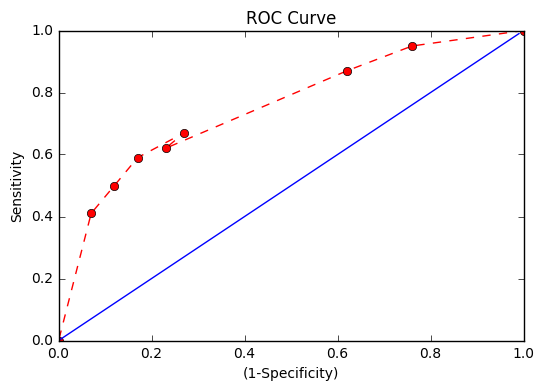

In [49]:
# ROC Curve

import matplotlib.pyplot as plt
%matplotlib inline
Sensitivity=[1,0.95,0.87,0.62,0.67,0.59,0.5,0.41,0]
FPR=[1,0.76,0.62,0.23,0.27,0.17,0.12,0.07,0]
plt.plot(FPR,Sensitivity,marker='o',linestyle='--',color='r')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('(1-Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Sudhanshu\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['ylim', 'var', 'table', 'colors', 'legend', 'clf', 'xlim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


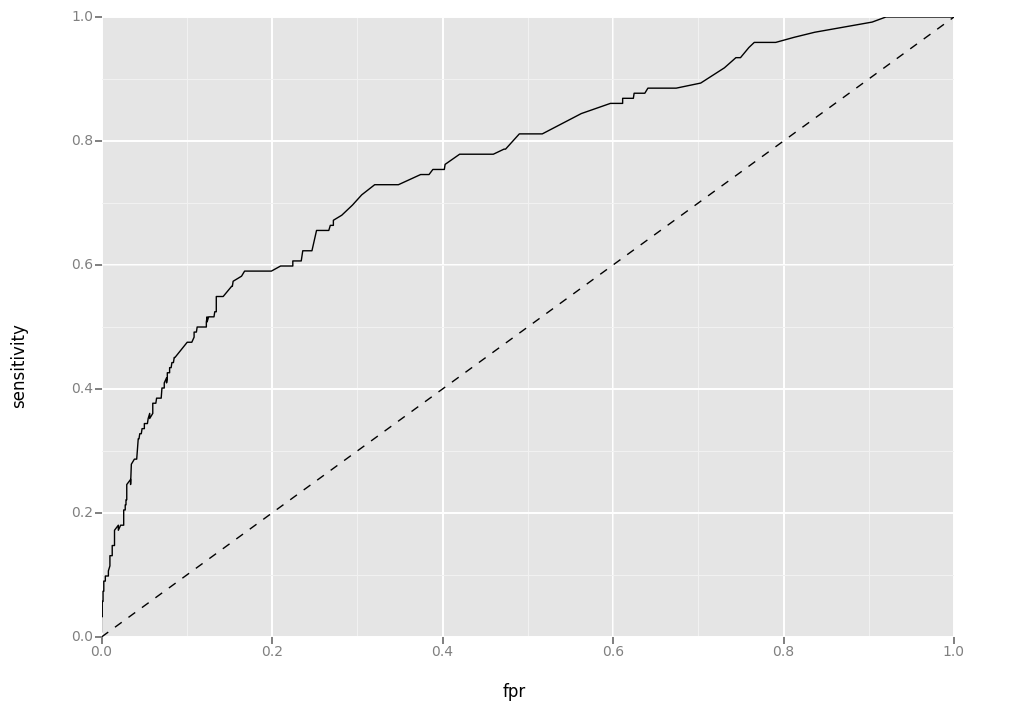

<ggplot: (129284381602)>

In [50]:
from sklearn import metrics
from ggplot import *
%pylab inline
prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)
df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
geom_line() +\
geom_abline(linetype='dashed')

In [52]:
#ggplot(df, aes(x='fpr', ymin=0, ymax='sensitivity')) + geom_area(alpha=0.2) + geom_line(aes(y='sensitivity')) + ggtitle("ROC Curve w/ AUC=%s" % str(auc))